# <center> YOUTHRIVE DATA SCEINCE CAPSTONE PROJECT <center> 
# <center> PRESNETED BY OZIOMA ONYEME <center> #

 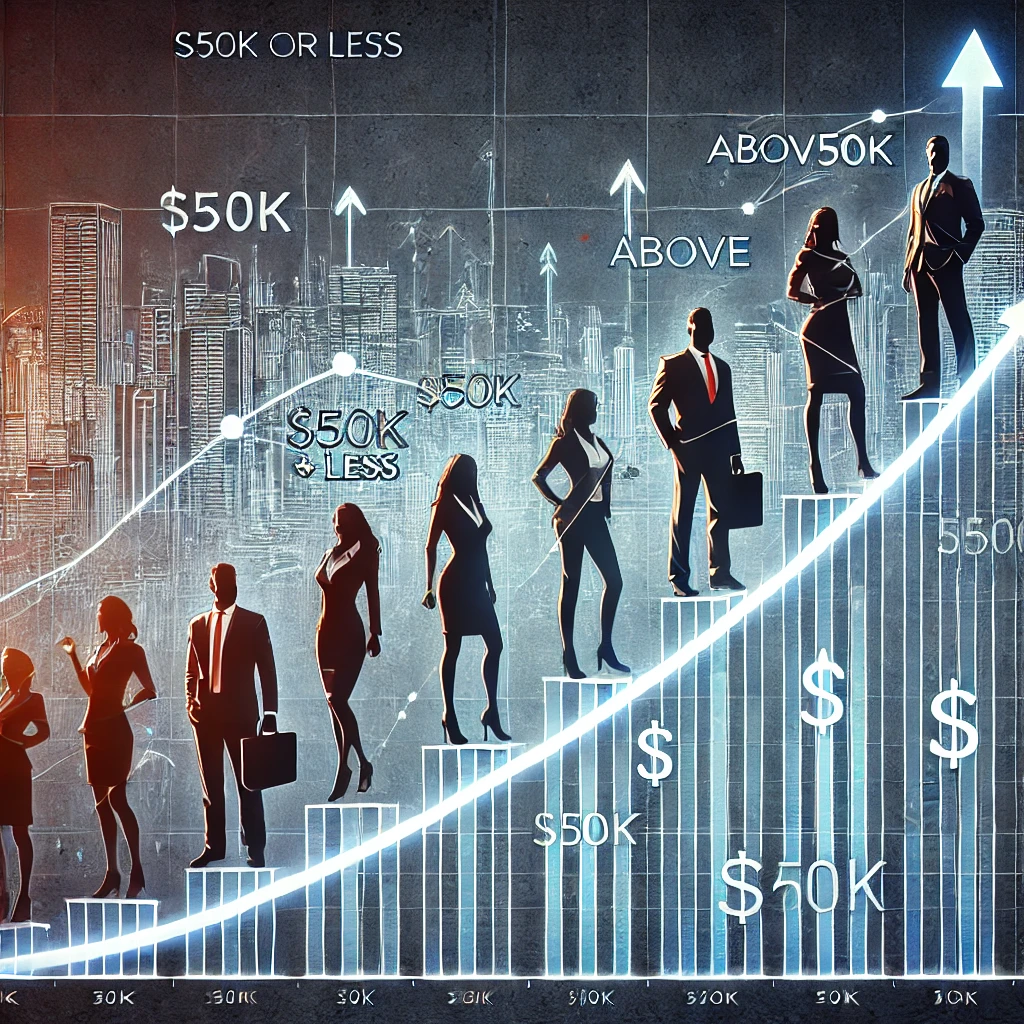



# <center>PROJECT INTRODUCTION <center> 
## This project aims to develop a machine learning model that uses census data to estimate whether or not an individual's annual income surpasses $50,000. This study makes use of a number of dataset elements, such as age, gender, and education, as well as work-related variables like capital gains, hours worked, and employment, to determine the main drivers affecting income levels.
# Key Objectives #
* # Data Exploration and Cleaning
* # Feature Engineering
* # Model Building
* # Insights and Analysis
* The given image represents the flow of incomes, illustrating the dynamic character of economic growth and variation across time. The image's figures, which depict people of various income levels, demonstrate how variables like employment type, working hours, and education affect income variances.
#

# Importing of  Libraries

In [1]:
#Import necessary libraries needed for my project
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler 
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split
from sklearn.metrics import (
accuracy_score, 
classification_report, 
precision_score,
recall_score,
f1_score
)
from sklearn.ensemble import RandomForestClassifier
# this Libraries below is what i used to train my model in other algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV # using this librarie for Hyperparameter tuning of my model
#these import warnings helps me to ignore warning displayed my pythons
import warnings
warnings.filterwarnings('ignore')
from sklearn.metrics import roc_auc_score, roc_curve, auc # using this librarie to compare the performance of my models


# Data Importation

In [3]:
#loading my dataset to enable me have carry out my EDA
data = pd.read_csv("income_data.csv")

# Initial Data Inspection

In [5]:
#print(f'i use this to viwe the first few Rows{data.head(3)}')
print(data.head(5))

   age         workclass  fnlwgt  education  education-num  \
0   39         State-gov   77516  Bachelors             13   
1   50  Self-emp-not-inc   83311  Bachelors             13   
2   38           Private  215646    HS-grad              9   
3   53           Private  234721       11th              7   
4   28           Private  338409  Bachelors             13   

       marital-status         occupation   relationship   race     sex  \
0       Never-married       Adm-clerical  Not-in-family  White    Male   
1  Married-civ-spouse    Exec-managerial        Husband  White    Male   
2            Divorced  Handlers-cleaners  Not-in-family  White    Male   
3  Married-civ-spouse  Handlers-cleaners        Husband  Black    Male   
4  Married-civ-spouse     Prof-specialty           Wife  Black  Female   

   capital-gain  capital-loss  hours-per-week native-country income  
0          2174             0              40  United-States  <=50K  
1             0             0             

In [6]:
# having a view of the last 3 Rows of my dataset
print(data.tail(3))

       age     workclass  fnlwgt  education  education-num  \
48839   38       Private  374983  Bachelors             13   
48840   44       Private   83891  Bachelors             13   
48841   35  Self-emp-inc  182148  Bachelors             13   

           marital-status       occupation relationship                race  \
48839  Married-civ-spouse   Prof-specialty      Husband               White   
48840            Divorced     Adm-clerical    Own-child  Asian-Pac-Islander   
48841  Married-civ-spouse  Exec-managerial      Husband               White   

        sex  capital-gain  capital-loss  hours-per-week native-country income  
48839  Male             0             0              50  United-States  <=50K  
48840  Male          5455             0              40  United-States  <=50K  
48841  Male             0             0              60  United-States   >50K  


In [7]:

#Check for missing values and basic statistics
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       47879 non-null  object
 2   fnlwgt          48842 non-null  int64 
 3   education       48842 non-null  object
 4   education-num   48842 non-null  int64 
 5   marital-status  48842 non-null  object
 6   occupation      47876 non-null  object
 7   relationship    48842 non-null  object
 8   race            48842 non-null  object
 9   sex             48842 non-null  object
 10  capital-gain    48842 non-null  int64 
 11  capital-loss    48842 non-null  int64 
 12  hours-per-week  48842 non-null  int64 
 13  native-country  48568 non-null  object
 14  income          48842 non-null  object
dtypes: int64(6), object(9)
memory usage: 5.6+ MB
None


In [8]:
print(f' using this function to have a describetion of my dataset{data.describe()}')

 using this function to have a describetion of my dataset                age        fnlwgt  education-num  capital-gain  capital-loss  \
count  48842.000000  4.884200e+04   48842.000000  48842.000000  48842.000000   
mean      38.643585  1.896641e+05      10.078089   1079.067626     87.502314   
std       13.710510  1.056040e+05       2.570973   7452.019058    403.004552   
min       17.000000  1.228500e+04       1.000000      0.000000      0.000000   
25%       28.000000  1.175505e+05       9.000000      0.000000      0.000000   
50%       37.000000  1.781445e+05      10.000000      0.000000      0.000000   
75%       48.000000  2.376420e+05      12.000000      0.000000      0.000000   
max       90.000000  1.490400e+06      16.000000  99999.000000   4356.000000   

       hours-per-week  
count    48842.000000  
mean        40.422382  
std         12.391444  
min          1.000000  
25%         40.000000  
50%         40.000000  
75%         45.000000  
max         99.000000  


In [9]:
data.isnull().sum()

age                 0
workclass         963
fnlwgt              0
education           0
education-num       0
marital-status      0
occupation        966
relationship        0
race                0
sex                 0
capital-gain        0
capital-loss        0
hours-per-week      0
native-country    274
income              0
dtype: int64

In [10]:
#  Replaceing the missing values in my dataset with Nan using the np.nan function 
data = data.replace('?', np.nan)
data = data.dropna()

In [11]:
print(data.shape)

(45222, 15)


# Exploratory Data Analysis (EDA)

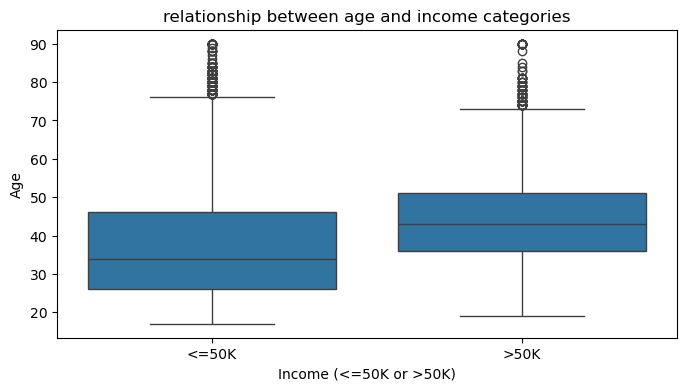

In [13]:
 #am using a boxplot grap to show the relationshipe b/w age and income or how age has affected income distribution
plt.figure(figsize=(8, 4))
sns.boxplot(x='income', y='age', data=data)
plt.title('relationship between age and income categories')
plt.xlabel('Income (<=50K or >50K)')
plt.ylabel('Age')
plt.show()

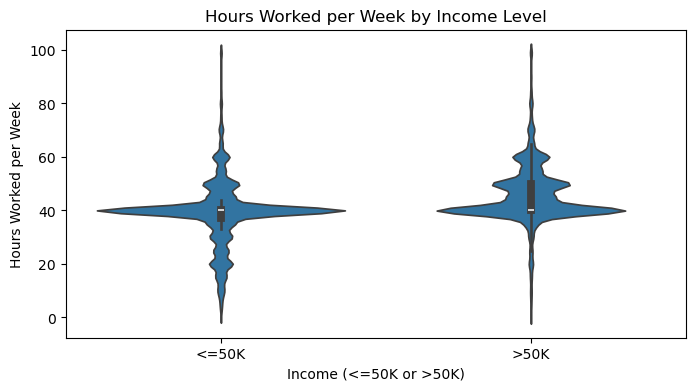

In [14]:
#am using the violin_Plot to show Hours Worked per week and the Income level
plt.figure(figsize=(8, 4))
sns.violinplot(x='income', y='hours-per-week', data=data)
plt.title('Hours Worked per Week by Income Level')
plt.xlabel('Income (<=50K or >50K)')
plt.ylabel('Hours Worked per Week')
plt.show()


## Data Preprocessing and Feature Engineering

In [16]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

In [17]:
#creating a simple imputer objects
cat_variables = data.select_dtypes(exclude=np.number)
num_variables = data.select_dtypes(include=np.number)
print(cat_variables)
#print(num_veriables)

              workclass  education      marital-status         occupation  \
0             State-gov  Bachelors       Never-married       Adm-clerical   
1      Self-emp-not-inc  Bachelors  Married-civ-spouse    Exec-managerial   
2               Private    HS-grad            Divorced  Handlers-cleaners   
3               Private       11th  Married-civ-spouse  Handlers-cleaners   
4               Private  Bachelors  Married-civ-spouse     Prof-specialty   
...                 ...        ...                 ...                ...   
48836           Private  Bachelors       Never-married     Prof-specialty   
48837           Private  Bachelors            Divorced     Prof-specialty   
48839           Private  Bachelors  Married-civ-spouse     Prof-specialty   
48840           Private  Bachelors            Divorced       Adm-clerical   
48841      Self-emp-inc  Bachelors  Married-civ-spouse    Exec-managerial   

        relationship                race     sex native-country income  
0 

In [18]:
# because of the high cardinality variables, am using label encoding
high_cardinality_cols = [col for col in data.columns if data[col].nunique() >= 10]

# Apply label encoding
label_encoders = {}
for col in high_cardinality_cols:
    le = LabelEncoder()
    data[col] = le.fit_transform(data[col])
    label_encoders[col] = le 

In [19]:
#get my target variable (income) to binary labels
data['income'] = data['income'].apply(lambda x: 1 if x == '>50K' else 0)

In [21]:
#data.head(3)
#data.shape
print(data.nunique())

age                  74
workclass             7
fnlwgt            26741
education            16
education-num        16
marital-status        7
occupation           14
relationship          6
race                  5
sex                   2
capital-gain        121
capital-loss         97
hours-per-week       96
native-country       41
income                2
dtype: int64


In [26]:
data

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,22,State-gov,3217,9,12,Never-married,0,Not-in-family,White,Male,26,0,39,38,0
1,33,Self-emp-not-inc,3519,9,12,Married-civ-spouse,3,Husband,White,Male,0,0,12,38,0
2,21,Private,17196,11,8,Divorced,5,Not-in-family,White,Male,0,0,39,38,0
3,36,Private,18738,1,6,Married-civ-spouse,5,Husband,Black,Male,0,0,39,38,0
4,11,Private,23828,9,12,Married-civ-spouse,9,Wife,Black,Female,0,0,39,4,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48836,16,Private,19515,9,12,Never-married,9,Own-child,White,Male,0,0,39,38,0
48837,22,Private,17175,9,12,Divorced,9,Not-in-family,White,Female,0,0,35,38,0
48839,21,Private,24889,9,12,Married-civ-spouse,9,Husband,White,Male,0,0,49,38,0
48840,27,Private,3561,9,12,Divorced,0,Own-child,Asian-Pac-Islander,Male,81,0,39,38,0


In [31]:
data.shape

(45222, 15)

In [33]:
# Create an interaction feature between age and hours-per-week
data['age_hours_interaction'] = data['age'] * data['hours-per-week']


In [34]:
cat_variables

,workclass,education,marital-status,occupation,relationship,race,sex,native-country,income
0,State-gov,Bachelors,Never-married,Adm-clerical,Not-in-family,White,Male,United-States,<=50K
1,Self-emp-not-inc,Bachelors,Married-civ-spouse,Exec-managerial,Husband,White,Male,United-States,<=50K
2,Private,HS-grad,Divorced,Handlers-cleaners,Not-in-family,White,Male,United-States,<=50K
3,Private,11th,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,United-States,<=50K
4,Private,Bachelors,Married-civ-spouse,Prof-specialty,Wife,Black,Female,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...
48836,Private,Bachelors,Never-married,Prof-specialty,Own-child,White,Male,United-States,<=50K
48837,Private,Bachelors,Divorced,Prof-specialty,Not-in-family,White,Female,United-States,<=50K
48839,Private,Bachelors,Married-civ-spouse,Prof-specialty,Husband,White,Male,United-States,<=50K
48840,Private,Bachelors,Divorced,Adm-clerical,Own-child,Asian-Pac-Islander,Male,United-States,<=50K


In [39]:
num_variables 

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
0,39,77516,13,2174,0,40
1,50,83311,13,0,0,13
2,38,215646,9,0,0,40
3,53,234721,7,0,0,40
4,28,338409,13,0,0,40
...,...,...,...,...,...,...
48836,33,245211,13,0,0,40
48837,39,215419,13,0,0,36
48839,38,374983,13,0,0,50
48840,44,83891,13,5455,0,40


In [42]:
#carrying out my Feature Scaling to ensure they are on a comparable 
std_scaler = StandardScaler()

min_max = MinMaxScaler()

std_scaler.fit_transform(num_variables)

min_max.fit_transform(num_variables)

array([[0.30136986, 0.04335003, 0.8       , 0.02174022, 0.        ,
        0.39795918],
       [0.45205479, 0.04727376, 0.8       , 0.        , 0.        ,
        0.12244898],
       [0.28767123, 0.1368765 , 0.53333333, 0.        , 0.        ,
        0.39795918],
       ...,
       [0.28767123, 0.24476203, 0.8       , 0.        , 0.        ,
        0.5       ],
       [0.36986301, 0.04766648, 0.8       , 0.05455055, 0.        ,
        0.39795918],
       [0.24657534, 0.11419533, 0.8       , 0.        , 0.        ,
        0.60204082]])


* #  Model Development

In [49]:
#spliting into my feature(x) and tagert (y)
X = data.drop('income', axis=1)
y = data['income']

# Train-Test Split:

In [53]:
#splitting my data into train and test..my train is 80% and test is 20%
X = pd.get_dummies(X, drop_first=True)
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

In [55]:
#data.shape

# Model Selection and Training:

In [58]:
# Initialize the Random Forest classifier
model = RandomForestClassifier( n_estimators=100, random_state=42)

In [60]:
# Train the model
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [61]:
# Making my predictions
y_pred = model.predict(X_test)

# Model Evaluation:

In [63]:
pre_score = precision_score(y_test, y_pred)
acc= accuracy_score(y_test, y_pred)
rec = recall_score(y_test, y_pred)
f_1 = f1_score(y_test, y_pred)
class_rep = classification_report(y_test, y_pred)

In [64]:
print(f'precision_score result   {pre_score}')
print(f'accuracy_score result    {acc}')
print(f'recall_score result      {rec}')
print(f' f1_score result         {f_1}')
print(f'classification_report    {class_rep}')

precision_score result   0.7520576131687243
accuracy_score result    0.8540630182421227
recall_score result      0.6356521739130435
 f1_score result         0.6889726672950047
classification_report                  precision    recall  f1-score   support

           0       0.88      0.93      0.90      6745
           1       0.75      0.64      0.69      2300

    accuracy                           0.85      9045
   macro avg       0.82      0.78      0.80      9045
weighted avg       0.85      0.85      0.85      9045



# TRANINING MY MODEL WITH OTHER algorithms

# 1 tranning with logisticRegression model

In [68]:
#Initialize  LogisticRegression model
model = LogisticRegression(max_iter = 1000)

In [69]:
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [70]:
# making my predictions
y_pred = model.predict(X_test)

In [71]:
#model evalutions
acc_reg = accuracy_score(y_test, y_pred)
pre_reg = precision_score(y_test, y_pred)
f1_reg = f1_score(y_test, y_pred)
rec_reg = recall_score(y_test, y_pred)
class_reg = classification_report(y_test, y_pred)

In [72]:
print(f'accuracy_score   {acc_reg}  for logistic_Regression')
print(f'precision_score  {pre_reg}   for logistic_Regression')
print(f' f1_score        {f1_reg}  for logistic_Regression')
print(f' recall_score    {rec_reg}   for logistic_Regression') 
print(f'classification_report {class_reg}  for logistic_Regression')

accuracy_score   0.8296296296296296  for logistic_Regression
precision_score  0.7077175697865353   for logistic_Regression
 f1_score        0.6266052822873758  for logistic_Regression
 recall_score    0.5621739130434783   for logistic_Regression
classification_report               precision    recall  f1-score   support

           0       0.86      0.92      0.89      6745
           1       0.71      0.56      0.63      2300

    accuracy                           0.83      9045
   macro avg       0.78      0.74      0.76      9045
weighted avg       0.82      0.83      0.82      9045
  for logistic_Regression


# 2 trainning with DecisionTreeClassifier model

In [76]:
model = DecisionTreeClassifier(random_state=42)

In [81]:
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

In [82]:
y_pred = model.predict(X_test)

In [83]:
# evaluting my model using classification_report, precision
acc_dec = accuracy_score(y_test, y_pred)
pre_dec = precision_score(y_test, y_pred)
rec_dec = recall_score(y_test, y_pred)
f1_dec = f1_score(y_test, y_pred)
class_dec = classification_report(y_test, y_pred)

In [84]:
print(f'ccuracy_score   {acc_dec}  for DecisionTreeClassifier')
print(f'precision_score {pre_dec}  for DecisionTreeClassifier')
print(f'recall_score    {rec_dec}  for DecisionTreeClassifier')
print(f'f1_score        {f1_dec}   for DecisionTreeClassifier')
print(f'classification_report {class_dec} for DecisionTreeClassifier')

ccuracy_score   0.8100608070757325  for DecisionTreeClassifier
precision_score 0.625974025974026  for DecisionTreeClassifier
recall_score    0.628695652173913  for DecisionTreeClassifier
f1_score        0.6273318872017354   for DecisionTreeClassifier
classification_report               precision    recall  f1-score   support

           0       0.87      0.87      0.87      6745
           1       0.63      0.63      0.63      2300

    accuracy                           0.81      9045
   macro avg       0.75      0.75      0.75      9045
weighted avg       0.81      0.81      0.81      9045
 for DecisionTreeClassifier


# 3 Tranning with KNeigKNhborsClassifier model

In [86]:
model = KNeighborsClassifier(n_neighbors= 7  ) # using  7 neighbors to train my model

In [87]:
model. fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=7)

In [88]:
y_pred = model.predict(X_test)

In [89]:
# evaluting my model using classification_report, precision
acc_knn = accuracy_score(y_test, y_pred)
pre_knn = precision_score(y_test, y_pred)
rec_knn = recall_score(y_test, y_pred)
f1_knn = f1_score(y_test, y_pred)
class_knn = classification_report(y_test, y_pred)

In [92]:
print(f'accuracy_score {acc_knn:.2} for KNeighborsClassifier')
print(f'precision_score {pre_knn:.2} for KNeighborsClassifier')
print(f'recall_score {rec_knn:.2} for KNeighborsClassifier')
print(f'f1_score {f1_knn:.2} for KNeighborsClassifier')
print(f'classification_report {class_knn} for KNeighborsClassifier')

accuracy_score 0.74 for KNeighborsClassifier
precision_score 0.47 for KNeighborsClassifier
recall_score 0.2 for KNeighborsClassifier
f1_score 0.29 for KNeighborsClassifier
classification_report               precision    recall  f1-score   support

           0       0.77      0.92      0.84      6745
           1       0.47      0.20      0.29      2300

    accuracy                           0.74      9045
   macro avg       0.62      0.56      0.56      9045
weighted avg       0.70      0.74      0.70      9045
 for KNeighborsClassifier


# here am using Hyperparameter tuning for my model

In [97]:
# Define parameter grid
log_reg_param_grid = {
    'C': [0.01, 0.1, 1, 10, 100],
    'penalty': ['l1', 'l2'],
    'solver': ['liblinear']  # 'liblinear' works with 'l1' and 'l2'
}

# Initialize Logistic Regression
log_reg = LogisticRegression()

# GridSearchCV for Logistic Regression
log_reg_cv = GridSearchCV(log_reg, log_reg_param_grid, cv=5, scoring='roc_auc', n_jobs=-1)
log_reg_cv.fit(X_train, y_train)

# Print best parameters and AUC score
print(f"Best Parameters for Logistic Regression: {log_reg_cv.best_params_}")
print(f"Best AUC Score for Logistic Regression: {log_reg_cv.best_score_:.2f}")


Best Parameters for Logistic Regression: {'C': 10, 'penalty': 'l1', 'solver': 'liblinear'}
Best AUC Score for Logistic Regression: 0.90


# here am Using regularization in my train modle

In [117]:
log_reg = LogisticRegression(penalty="elasticnet", solver="saga", l1_ratio=0.3)
tree = DecisionTreeClassifier(min_samples_leaf= 2, random_state= 42)
Ran = RandomForestClassifier(n_estimators=1000, random_state=42)
knn = KNeighborsClassifier(n_neighbors=7)

log_reg.fit(X_train, y_train)
tree.fit(X_train, y_train)
Ran.fit(X_train, y_train)
knn.fit(X_train, y_train)

y_pred_train = log_reg.predict(X_train)
y_pred_test = log_reg.predict(X_test)


acc_train = accuracy_score(y_train, y_pred_train)
acc_test = accuracy_score(y_test, y_pred_test)

print(f"Train accuracy: {acc:.2f}")
print(f"Test accuracy: {acc:.2f}")

Train accuracy: 0.85
Test accuracy: 0.85


# here am Comparing 3 model performance using ROC_CURVE


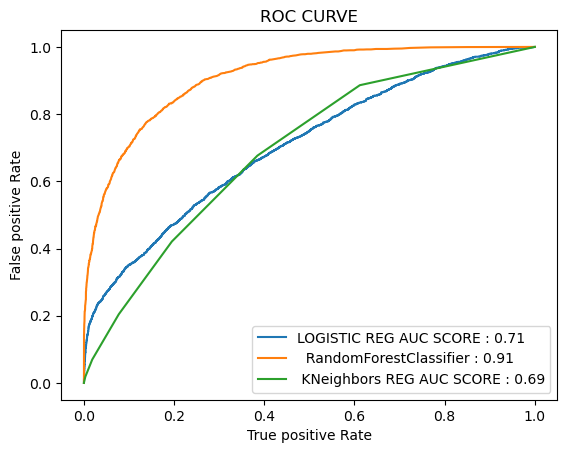

In [118]:
y_pred_proba_log = log_reg.predict_proba(X_test)
#y_pred_proba_tree = tree.predict_log_proba(X_test)
y_pred_proba_Ran = Ran.predict_proba(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)

y_pred_proba_log = y_pred_proba_log[:, 1]  # for Logistic Regression
#y_pred_proba_tree = y_pred_proba_tree[:,1]
y_pred_proba_Ran = y_pred_proba_Ran[:, 1] # for Random Forest
y_pred_proba_knn = y_pred_proba_knn[:, 1]  # for K-Nearest Neighbors


fpr_log, tpr_log, thresholds = roc_curve(y_test, y_pred_proba_log)
auc_score_log = auc(fpr_log, tpr_log)

#fpr_tree, tpr_tree, thresholds = roc_curve(y_test, y_pred_proba_tree)
#auc_score_tree = auc(fpr_tree, tpr_tree)

fpr_Ran, tpr_Ran, thresholds = roc_curve(y_test, y_pred_proba_Ran)
auc_score_Ran = auc(fpr_Ran, tpr_Ran)

fpr_knn, tpr_knn, thresholds = roc_curve(y_test, y_pred_proba_knn)
auc_score_knn = auc(fpr_knn, tpr_knn)

plt.plot(fpr_log, tpr_log, label=f"LOGISTIC REG AUC SCORE : {auc_score_log:.2f}")
#plt.plot(fpr_tree, tpr_tree, lable = f'DecisionTreeClassifier REG AUC SCORE :{auc_score_tree:.2f}')
plt.plot(fpr_Ran, tpr_Ran, label=f"  RandomForestClassifier : {auc_score_Ran:.2f}")
plt.plot(fpr_knn, tpr_knn, label=f" KNeighbors REG AUC SCORE : {auc_score_knn:.2f}")


plt.ylabel("False positive Rate")
plt.xlabel("True positive Rate")
plt.title("ROC CURVE")
plt.legend()
plt.show()

# Key Insights from Exploratory Data Analysis (EDA)


# Age and Income:

Older individuals are more likely to earn over $50K. There is a positive correlation between age and income, but income tends to plateau after a certain age (around 50-60 years).
Younger people (<30 years old) are primarily in the <=50K category.

# Hours Worked per Week and Income:

Individuals who work 40+ hours per week have a higher probability of earning >50K.
Part-time workers (less than 40 hours per week) are primarily in the <=50K group.

# Saving my model as a file using joblib

In [7]:
!pip install joblib

In [17]:
import joblib
joblib.dump (model,'RandomForestClassifier')
# here am trying to save my model to file but due to the fact that i tranined 
# my model with different machine learning algorithm saving it is becoming a little issue